In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks", color_codes=True)

In [57]:
df=pd.read_csv("/content/games.csv")


In [54]:
df.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.500000e+12,1.500000e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.500000e+12,1.500000e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.500000e+12,1.500000e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.500000e+12,1.500000e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.500000e+12,1.500000e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


white    10001
black     9107
draw       950
Name: winner, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


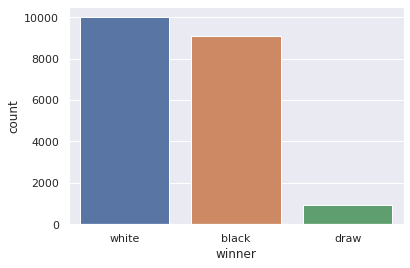

In [71]:
sns.countplot(df["winner"])
print(df.winner.value_counts())

Here we see that white players win more than blacks, in few cases games end with draw. 


What is the reason?

In [73]:
df.columns

Index(['id', 'rated', 'created_at', 'last_move_at', 'turns', 'victory_status',
       'winner', 'increment_code', 'white_id', 'white_rating', 'black_id',
       'black_rating', 'moves', 'opening_eco', 'opening_name', 'opening_ply'],
      dtype='object')

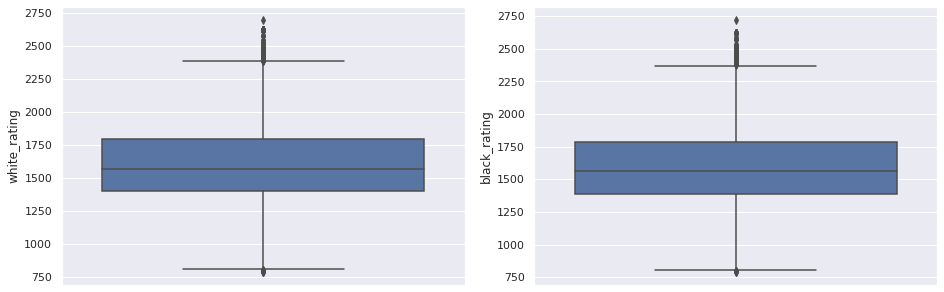

In [74]:
fig = plt.figure(constrained_layout=True, figsize = (13,16))
gs = fig.add_gridspec(4, 2)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])

sns.set_theme(style="darkgrid")
sns.boxplot(y=df["white_rating"],ax=ax1)
sns.boxplot(y=df["black_rating"],ax=ax2)



The ratings of white and black players are almost the same. So this can't be considered as a reason for which whites win.

In [ ]:
df.columns

Index(['id', 'rated', 'created_at', 'last_move_at', 'turns', 'victory_status',
       'winner', 'increment_code', 'white_id', 'white_rating', 'black_id',
       'black_rating', 'moves', 'opening_eco', 'opening_name', 'opening_ply'],
      dtype='object')

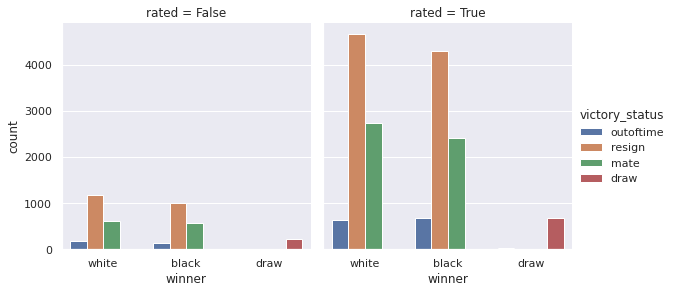

In [75]:
sns.set_theme(style="darkgrid")
g = sns.catplot(x="winner", hue="victory_status", col="rated",
                data=df, kind="count",
                height=4);


We see that among all games rated ones are more than the non-rated ones, but the proprotions of victory statuses in this two types are the same.The white players are in the leading position for all vistory_statuses except the outoftime.
And we see that games are mostly ended with resign.

So, from this two charts we can conclude that althogh the black and white players have the same ratings, the white players win more. 


Maybe the reason are the openings.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


A00    1007
C00     844
D00     739
B01     716
C41     691
       ... 
A24       1
A67       1
A71       1
E35       1
C90       1
Name: opening_eco, Length: 365, dtype: int64


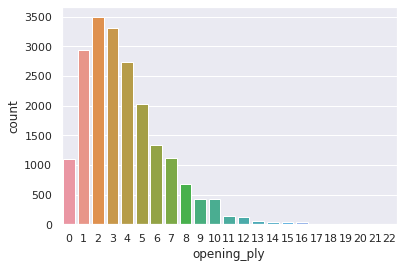

In [76]:
sns.countplot(df["opening_ply"])
print(df.opening_eco.value_counts())

Here we see what are the most popular openings.

In [77]:
sns.set_theme(style="ticks", color_codes=True)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 97.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 97.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 78.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


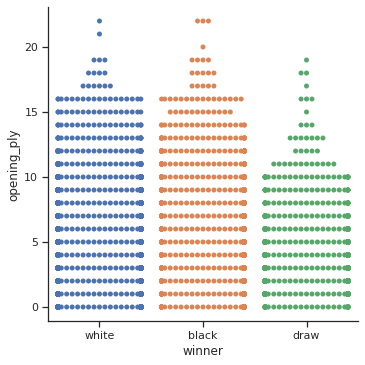

In [78]:
sns.catplot(x="winner", y="opening_ply",kind="swarm", data=df)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              20058 non-null  object 
 1   rated           20058 non-null  bool   
 2   created_at      20058 non-null  float64
 3   last_move_at    20058 non-null  float64
 4   turns           20058 non-null  int64  
 5   victory_status  20058 non-null  object 
 6   winner          20058 non-null  object 
 7   increment_code  20058 non-null  object 
 8   white_id        20058 non-null  object 
 9   white_rating    20058 non-null  int64  
 10  black_id        20058 non-null  object 
 11  black_rating    20058 non-null  int64  
 12  moves           20058 non-null  object 
 13  opening_eco     20058 non-null  object 
 14  opening_name    20058 non-null  object 
 15  opening_ply     20058 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(9)
memory usage: 2.3+ MB


In [79]:
df['w_winner'] = df.apply(lambda x: 1 if x['winner'] == 'white' else 0, axis =1)

In [81]:
df2=df.groupby(['opening_ply','winner']).count()['turns']
df2

opening_ply  winner
0            black      573
             draw        42
             white      482
1            black     1378
             draw       147
                       ... 
19           white        3
20           black        1
21           white        1
22           black        3
             white        1
Name: turns, Length: 64, dtype: int64

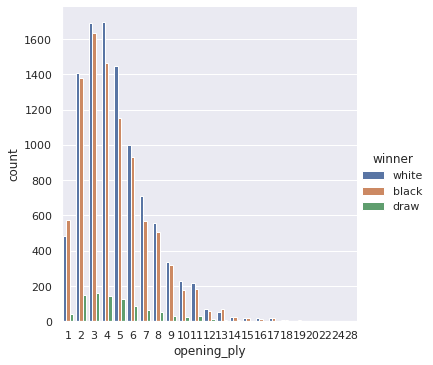

In [20]:
sns.set_theme(style="darkgrid")
g = sns.catplot(x="opening_ply", hue="winner",
                data=df, kind="count");

For some openings blacks are winners. But those openings are significantly less frequent than the others where winners are whites.


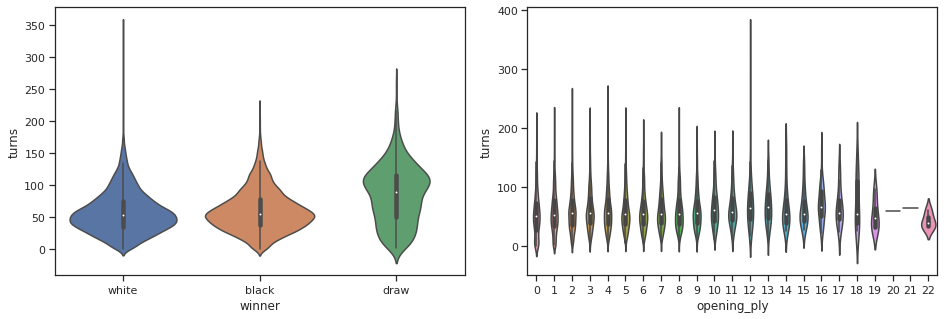

In [85]:
fig = plt.figure(constrained_layout=True, figsize = (13,16))
gs = fig.add_gridspec(4, 2)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])

sns.set_theme(style="darkgrid")
sns.violinplot(data = df, x = 'winner', y = 'turns',ax=ax1)
sns.violinplot(data = df, x = 'opening_ply', y = 'turns',ax=ax2)

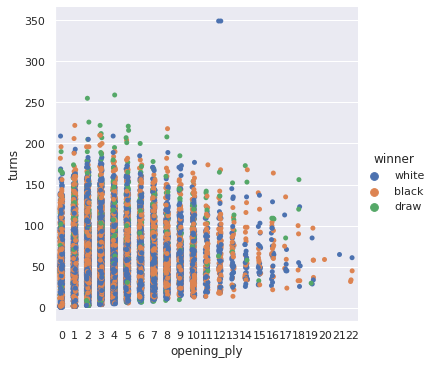

In [70]:
sns.catplot(
    data=df,
    x="opening_ply", y="turns",hue="winner",size="winner")

We see that for more popular openings the number of turns are more than for the other ones. And also we see that games mostly ended with draw then the turns are too much.

So I as a non chess player came to the conclusion that starting the game is a privilege․ And due to that privilage white players win more.